In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Datasets

In [2]:
orders = pd.read_csv(r"C:\Users\Dell\Downloads\Orders.csv")
products = pd.read_csv(r"C:\Users\Dell\Downloads\Products.csv")
suppliers = pd.read_csv(r"C:\Users\Dell\Downloads\Suppliers.csv")
customers = pd.read_csv(r"C:\Users\Dell\Downloads\Customers.csv")
regions = pd.read_csv(r"C:\Users\Dell\Downloads\Regions.csv")

In [3]:
orders.head()

,OrderID,ProductID,SupplierID,CustomerID,RegionID,OrderDate,Quantity,UnitPrice,UnitCost,Revenue,Cost,Profit,Discount,ShipDate
0,1,633,2,7684,5,2022-02-02,95,4189.08,3610.70,397962.60,343016.50,54946.10,0.019,2022-02-11
1,2,1595,29,6265,14,2022-07-09,39,3296.87,2777.35,128577.93,108316.65,20261.28,0.112,2022-07-18
2,3,729,11,19262,12,2022-02-11,57,4127.29,2969.45,235255.53,169258.65,65996.88,0.031,2022-02-20
3,4,31,10,8179,17,2018-03-16,50,2433.21,1658.11,121660.50,82905.50,38755.00,0.006,2018-03-22
4,5,244,40,10231,12,2019-01-30,1,4871.50,3757.63,4871.50,3757.63,1113.87,0.007,2019-02-03


In [4]:
products.head()

,ProductID,Category,Subcategory,UnitPrice,UnitCost
0,1,Electronics,Laptops,3678.73,2238.48
1,2,Electronics,Laptops,1053.27,698.33
2,3,Electronics,Laptops,2711.83,1855.74
3,4,Electronics,Laptops,3481.96,2833.93
4,5,Electronics,Laptops,1150.46,694.24


In [5]:
suppliers.head()

,SupplierID,SupplierName,Country,LeadTimeDays,OnTimeDeliveryRate,FreightCostPct
0,1,Supplier_1,Italy,5,0.95,0.083
1,2,Supplier_2,South Africa,15,0.83,0.110
2,3,Supplier_3,Singapore,17,0.73,0.055
3,4,Supplier_4,India,16,0.81,0.052
4,5,Supplier_5,Italy,9,0.89,0.042


In [6]:
customers.head()

,CustomerID,CustomerName,Segment,Country
0,1,Customer_1,Distributor,Nigeria
1,2,Customer_2,Retail,UK
2,3,Customer_3,Distributor,Egypt
3,4,Customer_4,Corporate,UK
4,5,Customer_5,Distributor,Mexico


In [7]:
regions.head()

,Region,Country,Manager,RegionID
0,North America,USA,North America Manager,1
1,North America,Canada,North America Manager,2
2,North America,Mexico,North America Manager,3
3,Europe,UK,Europe Manager,4
4,Europe,Germany,Europe Manager,5


Merging all the datasets with orders 

In [9]:
df = (orders
      .merge(products, on='ProductID', how='left')
      .merge(suppliers, on='SupplierID', how='left')
      .merge(regions, on="RegionID", how="left")
      .merge(customers, on='CustomerID', how='left')
     )
df.head()

,OrderID,ProductID,SupplierID,CustomerID,RegionID,OrderDate,Quantity,UnitPrice_x,UnitCost_x,Revenue,...,Country_x,LeadTimeDays,OnTimeDeliveryRate,FreightCostPct,Region,Country_y,Manager,CustomerName,Segment,Country
0,1,633,2,7684,5,2022-02-02,95,4189.08,3610.70,397962.60,...,South Africa,15,0.83,0.110,Europe,Germany,Europe Manager,Customer_7684,Retail,Mexico
1,2,1595,29,6265,14,2022-07-09,39,3296.87,2777.35,128577.93,...,UK,8,0.97,0.051,South America,Chile,South America Manager,Customer_6265,Corporate,South Africa
2,3,729,11,19262,12,2022-02-11,57,4127.29,2969.45,235255.53,...,Canada,22,0.98,0.052,South America,Brazil,South America Manager,Customer_19262,Distributor,Japan
3,4,31,10,8179,17,2018-03-16,50,2433.21,1658.11,121660.50,...,Mexico,9,0.81,0.053,Africa,Egypt,Africa Manager,Customer_8179,Retail,Nigeria
4,5,244,40,10231,12,2019-01-30,1,4871.50,3757.63,4871.50,...,Egypt,4,0.79,0.062,South America,Brazil,South America Manager,Customer_10231,Distributor,USA


In [10]:
df.shape

(300000, 29)

##### Dataset has 3 Lakh rows and 29 columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderID             300000 non-null  int64  
 1   ProductID           300000 non-null  int64  
 2   SupplierID          300000 non-null  int64  
 3   CustomerID          300000 non-null  int64  
 4   RegionID            300000 non-null  int64  
 5   OrderDate           300000 non-null  object 
 6   Quantity            300000 non-null  int64  
 7   UnitPrice_x         300000 non-null  float64
 8   UnitCost_x          300000 non-null  float64
 9   Revenue             300000 non-null  float64
 10  Cost                300000 non-null  float64
 11  Profit              300000 non-null  float64
 12  Discount            300000 non-null  float64
 13  ShipDate            300000 non-null  object 
 14  Category            300000 non-null  object 
 15  Subcategory         300000 non-nul

In [12]:
df.describe()

,OrderID,ProductID,SupplierID,CustomerID,RegionID,Quantity,UnitPrice_x,UnitCost_x,Revenue,Cost,Profit,Discount,UnitPrice_y,UnitCost_y,LeadTimeDays,OnTimeDeliveryRate,FreightCostPct
count,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,150000.500000,1492.46225,25.520843,9999.327747,8.998317,50.086977,2526.945579,1889.262459,126589.787763,94629.783091,31960.004672,0.074922,2526.945579,1889.262459,16.198903,0.837116,0.084098
std,86602.684716,861.11475,14.418605,5771.408891,4.898584,28.611552,1430.619039,1096.443350,109729.875202,83178.515888,31317.742012,0.043333,1430.619039,1096.443350,8.471841,0.077248,0.034804
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.940000,8.220000,10.940000,8.220000,1.740000,0.000000,10.940000,8.220000,2.000000,0.700000,0.024000
25%,75000.750000,746.00000,13.000000,4996.000000,5.000000,25.000000,1277.330000,969.030000,35293.665000,26166.367500,7871.200000,0.037000,1277.330000,969.030000,9.000000,0.770000,0.053000
50%,150000.500000,1492.00000,26.000000,9998.000000,9.000000,50.000000,2588.780000,1887.540000,96137.080000,71288.140000,21854.840000,0.075000,2588.780000,1887.540000,15.000000,0.830000,0.081000
75%,225000.250000,2237.00000,38.000000,15000.000000,13.000000,75.000000,3748.320000,2780.550000,193608.600000,144013.507500,46566.375000,0.112000,3748.320000,2780.550000,25.000000,0.890000,0.111000
max,300000.000000,2985.00000,50.000000,20000.000000,17.000000,99.000000,4998.570000,4435.320000,494858.430000,439096.680000,187060.500000,0.150000,4998.570000,4435.320000,29.000000,0.980000,0.150000


In [13]:
df.isnull().sum()

OrderID               0
ProductID             0
SupplierID            0
CustomerID            0
RegionID              0
OrderDate             0
Quantity              0
UnitPrice_x           0
UnitCost_x            0
Revenue               0
Cost                  0
Profit                0
Discount              0
ShipDate              0
Category              0
Subcategory           0
UnitPrice_y           0
UnitCost_y            0
SupplierName          0
Country_x             0
LeadTimeDays          0
OnTimeDeliveryRate    0
FreightCostPct        0
Region                0
Country_y             0
Manager               0
CustomerName          0
Segment               0
Country               0
dtype: int64

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
numeric_columns.head()

,OrderID,ProductID,SupplierID,CustomerID,RegionID,Quantity,UnitPrice_x,UnitCost_x,Revenue,Cost,Profit,Discount,UnitPrice_y,UnitCost_y,LeadTimeDays,OnTimeDeliveryRate,FreightCostPct
0,1,633,2,7684,5,95,4189.08,3610.70,397962.60,343016.50,54946.10,0.019,4189.08,3610.70,15,0.83,0.110
1,2,1595,29,6265,14,39,3296.87,2777.35,128577.93,108316.65,20261.28,0.112,3296.87,2777.35,8,0.97,0.051
2,3,729,11,19262,12,57,4127.29,2969.45,235255.53,169258.65,65996.88,0.031,4127.29,2969.45,22,0.98,0.052
3,4,31,10,8179,17,50,2433.21,1658.11,121660.50,82905.50,38755.00,0.006,2433.21,1658.11,9,0.81,0.053
4,5,244,40,10231,12,1,4871.50,3757.63,4871.50,3757.63,1113.87,0.007,4871.50,3757.63,4,0.79,0.062


UnitPrice columns looks identical, let's check on that

In [19]:
(df['UnitPrice_x'] != df['UnitPrice_y']).sum()

0

In [20]:
(df['UnitCost_x'] != df['UnitCost_y']).sum()

0

So Unitprice_X and UnitCost_X are same as UnitPrice_Y and UnitCost_Y, we can keep one column on each and drop the other two

In [25]:
df.drop(columns=['UnitPrice_y', 'UnitCost_y'], inplace=True)

In [33]:
df = df.rename(columns={"UnitPrice_x": "UnitPrice", "UnitCost_x": "UnitCost"})

In [34]:
df.columns

Index(['OrderID', 'ProductID', 'SupplierID', 'CustomerID', 'RegionID',
       'OrderDate', 'Quantity', 'UnitPrice', 'UnitCost', 'Revenue', 'Cost',
       'Profit', 'Discount', 'ShipDate', 'Category', 'Subcategory',
       'SupplierName', 'Country_x', 'LeadTimeDays', 'OnTimeDeliveryRate',
       'FreightCostPct', 'Region', 'Country_y', 'Manager', 'CustomerName',
       'Segment', 'Country'],
      dtype='object')

In [39]:
(df['Country_x'] != df['Country_y']).sum()

282411

Both the country columns are different, need to find which country columns came from which table

In [44]:
temp1 = orders.merge(suppliers, on="SupplierID", how="left")
print(temp1.columns)

Index(['OrderID', 'ProductID', 'SupplierID', 'CustomerID', 'RegionID',
       'OrderDate', 'Quantity', 'UnitPrice', 'UnitCost', 'Revenue', 'Cost',
       'Profit', 'Discount', 'ShipDate', 'SupplierName', 'Country',
       'LeadTimeDays', 'OnTimeDeliveryRate', 'FreightCostPct'],
      dtype='object')


In [45]:
temp2 = temp1.merge(regions, on="RegionID", how="left")
print(temp2.columns)


Index(['OrderID', 'ProductID', 'SupplierID', 'CustomerID', 'RegionID',
       'OrderDate', 'Quantity', 'UnitPrice', 'UnitCost', 'Revenue', 'Cost',
       'Profit', 'Discount', 'ShipDate', 'SupplierName', 'Country_x',
       'LeadTimeDays', 'OnTimeDeliveryRate', 'FreightCostPct', 'Region',
       'Country_y', 'Manager'],
      dtype='object')


In [46]:
temp3 = temp2.merge(customers, on="CustomerID", how="left")
print(temp3.columns)

Index(['OrderID', 'ProductID', 'SupplierID', 'CustomerID', 'RegionID',
       'OrderDate', 'Quantity', 'UnitPrice', 'UnitCost', 'Revenue', 'Cost',
       'Profit', 'Discount', 'ShipDate', 'SupplierName', 'Country_x',
       'LeadTimeDays', 'OnTimeDeliveryRate', 'FreightCostPct', 'Region',
       'Country_y', 'Manager', 'CustomerName', 'Segment', 'Country'],
      dtype='object')


In [49]:
(df['Country'] != temp3['Country']).sum()

0

To rename the country_x, country_y and country, we have chekced those columns came from which tables and validated with temp3

In [50]:
df = df.rename(columns={
    "Country_x": "Supplier_Country",
    "Country_y": "Region_Country",
    "Country": "Customer_Country"
})


In [51]:
df.columns

Index(['OrderID', 'ProductID', 'SupplierID', 'CustomerID', 'RegionID',
       'OrderDate', 'Quantity', 'UnitPrice', 'UnitCost', 'Revenue', 'Cost',
       'Profit', 'Discount', 'ShipDate', 'Category', 'Subcategory',
       'SupplierName', 'Supplier_Country', 'LeadTimeDays',
       'OnTimeDeliveryRate', 'FreightCostPct', 'Region', 'Region_Country',
       'Manager', 'CustomerName', 'Segment', 'Customer_Country'],
      dtype='object')

#### Basic Business Health Metrics

In [63]:
print("Total Revenue:", df['Revenue'].sum())
print("Total Profit:", df['Profit'].sum())
print("Average Profit Margin:", (df['Profit'].sum() / df['Revenue'].sum()) * 100, "%")
print("Total Orders:", df['OrderID'].nunique())
print("Total Customers:", df['CustomerID'].nunique())
print("Total Suppliers:", df['SupplierID'].nunique())

Total Revenue: 37976936328.98999
Total Profit: 9588001401.73
Average Profit Margin: 25.24690596068679 %
Total Orders: 300000
Total Customers: 20000
Total Suppliers: 50


#### Category-Level Profitability

In [64]:
category_perf = df.groupby("Category")[["Revenue", "Profit"]].sum().sort_values("Profit", ascending=False)
print(category_perf)

                  Revenue        Profit
Category                               
Furniture    7.743409e+09  2.014937e+09
Machinery    7.725251e+09  1.942815e+09
Food         7.462055e+09  1.906310e+09
Clothing     7.399605e+09  1.870275e+09
Electronics  7.646617e+09  1.853663e+09


#### Supplier Performance

In [65]:
supplier_perf = df.groupby("SupplierName")[["Profit", "OnTimeDeliveryRate", "LeadTimeDays"]].mean().sort_values("Profit", ascending=False).head(10)
print(supplier_perf)

                    Profit  OnTimeDeliveryRate  LeadTimeDays
SupplierName                                                
Supplier_27   32932.160732                0.86           2.0
Supplier_24   32739.951146                0.90          10.0
Supplier_43   32626.870947                0.96          28.0
Supplier_6    32434.667352                0.89          15.0
Supplier_16   32427.303411                0.71          22.0
Supplier_45   32360.196270                0.89          11.0
Supplier_28   32333.512925                0.76          26.0
Supplier_22   32325.691709                0.84          29.0
Supplier_11   32321.381053                0.98          22.0
Supplier_30   32302.283889                0.87          10.0


#### Region-Wise Revenue

In [66]:
region_sales = df.groupby("Region")[["Revenue", "Profit"]].sum().sort_values("Revenue", ascending=False)
print(region_sales)


                    Revenue        Profit
Region                                   
Europe         8.942714e+09  2.261823e+09
Asia           8.936129e+09  2.256386e+09
South America  6.721702e+09  1.699475e+09
North America  6.699416e+09  1.685077e+09
Africa         6.676976e+09  1.685241e+09


### Visualisation

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='YearMonth'>

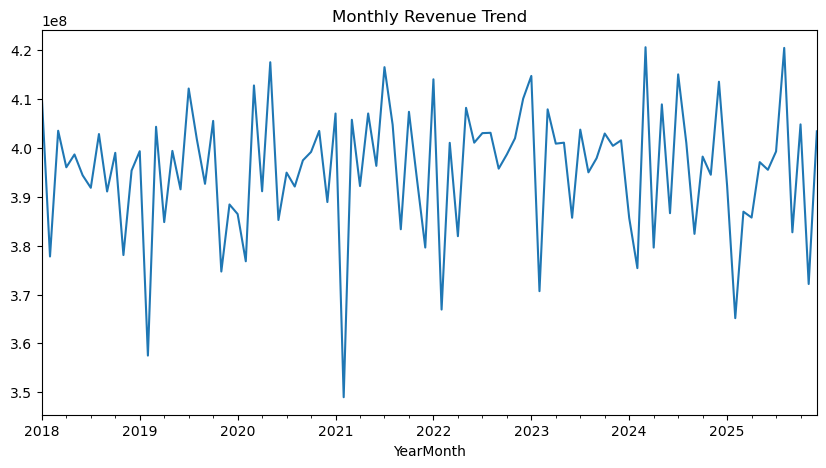

In [74]:
df["YearMonth"] = pd.to_datetime(df["OrderDate"]).dt.to_period("M")
monthly_sales = df.groupby("YearMonth")["Revenue"].sum()
monthly_sales.plot(kind='line', figsize=(10,5), title="Monthly Revenue Trend")


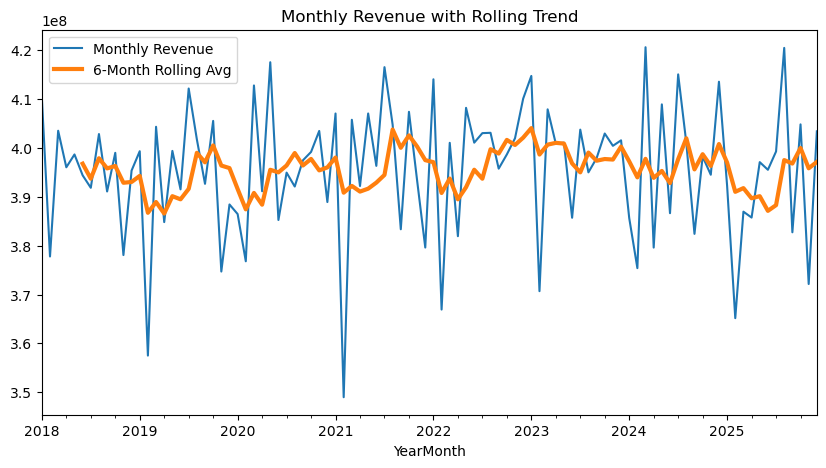

In [75]:
monthly_sales_rolling = monthly_sales.rolling(6).mean()
monthly_sales.plot(label="Monthly Revenue", figsize=(10,5))
monthly_sales_rolling.plot(label="6-Month Rolling Avg", linewidth=3)
plt.legend()
plt.title("Monthly Revenue with Rolling Trend")
plt.show()
